In [1]:
from pymongo import MongoClient
import pprint 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Requests sends and recieves HTTP requests.
import requests

# Beautiful Soup parses HTML documents in python.
from bs4 import BeautifulSoup
import copy

In [2]:
epl2020 = 'https://fbref.com/en/comps/9/3232/2019-2020-Premier-League-Stats' #Assigning the url
r = requests.get(epl2020)
r.status_code #Making sure we get the all good code
soup = BeautifulSoup(r.text, 'html.parser') #Pass into beautiful soup
tables = soup.find_all('table') #Grabing all the tables on the website
indices = tables[0].find_all('th') #Grabing the the table we want
rows = tables[0].find_all('tr')
columns = {}
for index in indices: #checking out the data
    columns[index.text] = None
all_data = []
keys = list(columns.keys())
for i,row in enumerate(rows): #Getting my data ready to put into pandas
    if i > 0:
        new_row = copy.copy(columns)
        entries = row.find_all('td')
        for j,entry in enumerate(entries):
            new_row[keys[j+1]]= entry.text
        all_data.append(new_row)
for dic in range(20): #Adjusting my data
    all_data[dic]['Rk'] = (dic+1)
df = pd.DataFrame(all_data) #Making a pandas df
dlst = list(range(17,38)) #Cleaning pandas df
df.drop(df.columns[dlst], axis = 1, inplace = True) 
df = df.style.hide_index()  
df 

Rk,Squad,MP,W,D,L,GF,GA,GDiff,Pts,xG,xGA,xGDiff,xGDiff/90,Attendance,Top Team Scorer,Goalkeeper
1,Liverpool,38,32,3,3,85,33,+52,99,71.5,40.0,+31.5,+0.83,"41,955",Mohamed Salah - 19,Alisson
2,Manchester City,38,26,3,9,102,35,+67,81,93.0,34.7,+58.3,+1.53,"37,097",Raheem Sterling - 20,Ederson
3,Manchester Utd,38,18,12,8,66,36,+30,66,59.4,37.4,+22.0,+0.58,"57,415","Marcus Rashford, Anthony Martial - 17",David de Gea
4,Chelsea,38,20,6,12,69,54,+15,66,66.6,37.9,+28.6,+0.75,"32,023",Tammy Abraham - 15,Kepa Arrizabalaga
5,Leicester City,38,18,8,12,67,41,+26,62,61.6,44.5,+17.1,+0.45,"25,312",Jamie Vardy - 23,Kasper Schmeichel
6,Tottenham,38,16,11,11,61,47,+14,59,46.1,52.0,-6.0,-0.16,"43,757",Harry Kane - 18,Hugo Lloris
7,Wolves,38,15,14,9,51,40,+11,59,47.1,34.8,+12.3,+0.32,"24,758",Raúl Jiménez - 17,Rui Patrício
8,Arsenal,38,14,14,10,56,48,+8,56,49.2,56.6,-7.3,-0.19,"47,589",Pierre-Emerick Aubameyang - 22,Bernd Leno
9,Sheffield Utd,38,14,12,12,39,39,0,54,41.5,47.9,-6.4,-0.17,"24,370","Oliver McBurnie, Lys Mousset - 6",Dean Henderson
10,Burnley,38,15,9,14,43,50,-7,54,43.9,48.3,-4.4,-0.12,"15,995",Chris Wood - 14,Nick Pope


In [6]:
web = 'https://fbref.com'
url = 'https://fbref.com/en/comps/9/Premier-League-Stats'
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')

lst = list(range(1996,2021))
lst = lst[::-1]
for year in lst:
    button = soup.select_one('#meta > div:nth-child(2) > div > a.button2.prev').get('href')
    webbutton = web + button
    r = requests.get(webbutton)
    soup = BeautifulSoup(r.text, 'html.parser')
    tables = soup.find_all('table') #Grabing all the tables on the website
    indices = tables[0].find_all('th') #Grabing the the table we want
    rows = tables[0].find_all('tr')
    columns = {}
    for index in indices: #checking out the data
        columns[index.text] = None
    all_data = []
    keys = list(columns.keys())
    for i,row in enumerate(rows): #Getting my data ready to put into pandas
        if i > 0:
            new_row = copy.copy(columns)
            entries = row.find_all('td')
            for j,entry in enumerate(entries):
                new_row[keys[j+1]]= entry.text
            all_data.append(new_row)
    for dic in range(20): #Adjusting my data
        all_data[dic]['Rk'] = (dic+1)
    df = pd.DataFrame(all_data) #Making a pandas df 
    dlst = list(range(len(columns)-24,len(columns))) #deleting last columns that are not needed
    df.drop(df.columns[dlst], axis = 1, inplace = True)
    df.to_csv(f'data/{year}.csv', sep='!', index=False)

In [7]:
df

,Rk,Squad,MP,W,D,L,GF,GA,GDiff,Pts
0,1,Manchester Utd,38,25,7,6,73,35,+38,82
1,2,Newcastle Utd,38,24,6,8,66,37,+29,78
2,3,Liverpool,38,20,11,7,70,34,+36,71
3,4,Aston Villa,38,18,9,11,52,35,+17,63
4,5,Arsenal,38,17,12,9,49,32,+17,63
5,6,Everton,38,17,10,11,64,44,+20,61
6,7,Blackburn,38,18,7,13,61,47,+14,61
7,8,Tottenham,38,16,13,9,50,38,+12,61
8,9,Nott'ham Forest,38,15,13,10,50,54,-4,58
9,10,West Ham,38,14,9,15,43,52,-9,51


In [30]:
all_df = []
for year in reversed(lst):
    df = pd.read_csv(f'data/{year}.csv', sep='!')
    all_df.append(df)

In [31]:
all_df[0]

,Rk,Squad,MP,W,D,L,GF,GA,GDiff,Pts
0,1,Manchester Utd,38,25,7,6,73,35,38,82
1,2,Newcastle Utd,38,24,6,8,66,37,29,78
2,3,Liverpool,38,20,11,7,70,34,36,71
3,4,Aston Villa,38,18,9,11,52,35,17,63
4,5,Arsenal,38,17,12,9,49,32,17,63
5,6,Everton,38,17,10,11,64,44,20,61
6,7,Blackburn,38,18,7,13,61,47,14,61
7,8,Tottenham,38,16,13,9,50,38,12,61
8,9,Nott'ham Forest,38,15,13,10,50,54,-4,58
9,10,West Ham,38,14,9,15,43,52,-9,51


In [33]:
totalgf = all_df[0]['GF'].sum()
totalgf

988

In [34]:
totalgf = all_df[24]['GF'].sum()
totalgf

1034

In [56]:
totalgf = []
for year in range(25):
    sumgf = all_df[year]['GF'].sum()
    totalgf.append(sumgf)

In [37]:
len(all_df)

25

In [39]:
lstgf

[988,
 970,
 1019,
 959,
 1060,
 992,
 1001,
 1000,
 1012,
 975,
 944,
 931,
 1002,
 942,
 1053,
 1063,
 1066,
 1063,
 1052,
 975,
 1026,
 1064,
 1018,
 1072]

In [51]:
lst_avg_gf = []
for year in range(25):
    avg_gf = all_df[year]['GF'].mean()
    lst_avg_gf.append(avg_gf)
lst_avg_gf
len(lst_avg_gf)

25

In [48]:
yr = lst[::-1]
yr
len(yr)

25

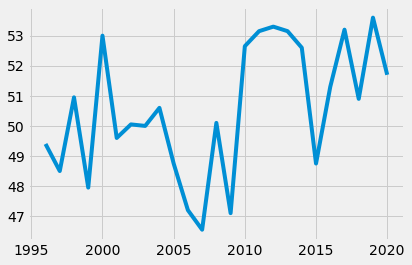

In [53]:
plt.plot(yr, lst_avg_gf)